In [58]:
import pandas as pd
import numpy as np
import seaborn as sns
from scipy import stats

In [59]:
df = pd.read_csv(r"C:\Users\admin\Downloads\house_price.csv")
df

,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250
...,...,...,...,...,...,...,...
13195,Whitefield,5 Bedroom,3453.0,4.0,231.00,5,6689
13196,other,4 BHK,3600.0,5.0,400.00,4,11111
13197,Raja Rajeshwari Nagar,2 BHK,1141.0,2.0,60.00,2,5258
13198,Padmanabhanagar,4 BHK,4689.0,4.0,488.00,4,10407


In [60]:
df.shape

(13200, 7)

In [61]:
df.head()

,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250


In [62]:
df.tail()

,location,size,total_sqft,bath,price,bhk,price_per_sqft
13195,Whitefield,5 Bedroom,3453.0,4.0,231.0,5,6689
13196,other,4 BHK,3600.0,5.0,400.0,4,11111
13197,Raja Rajeshwari Nagar,2 BHK,1141.0,2.0,60.0,2,5258
13198,Padmanabhanagar,4 BHK,4689.0,4.0,488.0,4,10407
13199,Doddathoguru,1 BHK,550.0,1.0,17.0,1,3090


In [63]:
df.columns

Index(['location', 'size', 'total_sqft', 'bath', 'price', 'bhk',
       'price_per_sqft'],
      dtype='object')

In [64]:
for i in df.columns:
    print (i)

location
size
total_sqft
bath
price
bhk
price_per_sqft


In [65]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13200 entries, 0 to 13199
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   location        13200 non-null  object 
 1   size            13200 non-null  object 
 2   total_sqft      13200 non-null  float64
 3   bath            13200 non-null  float64
 4   price           13200 non-null  float64
 5   bhk             13200 non-null  int64  
 6   price_per_sqft  13200 non-null  int64  
dtypes: float64(3), int64(2), object(2)
memory usage: 722.0+ KB


In [66]:
df.describe()

,total_sqft,bath,price,bhk,price_per_sqft
count,13200.000000,13200.000000,13200.000000,13200.000000,1.320000e+04
mean,1555.302783,2.691136,112.276178,2.800833,7.920337e+03
std,1237.323445,1.338915,149.175995,1.292843,1.067272e+05
min,1.000000,1.000000,8.000000,1.000000,2.670000e+02
25%,1100.000000,2.000000,50.000000,2.000000,4.267000e+03
50%,1275.000000,2.000000,71.850000,3.000000,5.438000e+03
75%,1672.000000,3.000000,120.000000,3.000000,7.317000e+03
max,52272.000000,40.000000,3600.000000,43.000000,1.200000e+07


## We can understand from the description that mean and median is not equal for price_per_sqft feature.
## This indicates the presence of outliers. Therefore handling of outliers is needed

In [67]:
df.dtypes

location           object
size               object
total_sqft        float64
bath              float64
price             float64
bhk                 int64
price_per_sqft      int64
dtype: object

In [68]:
#Checking missing values.
df.isnull().sum()

location          0
size              0
total_sqft        0
bath              0
price             0
bhk               0
price_per_sqft    0
dtype: int64

In [69]:
import matplotlib.pyplot as plt

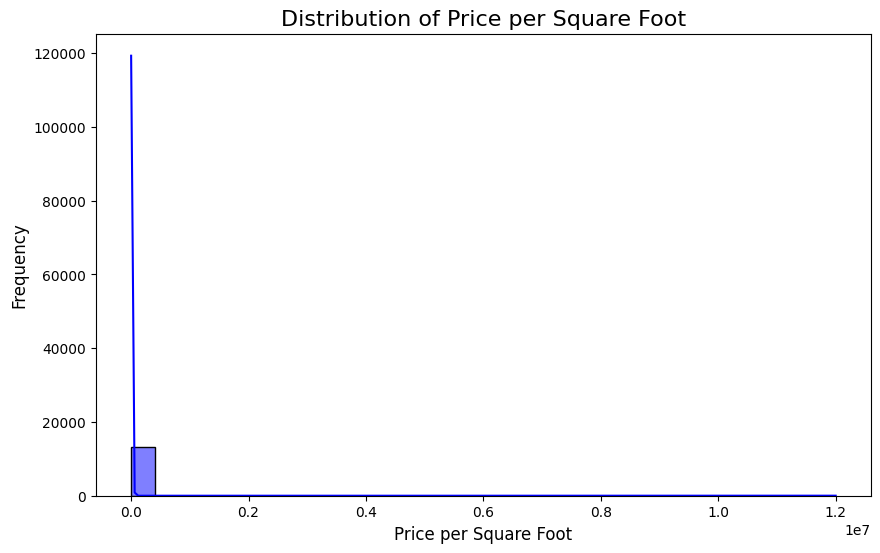

In [70]:
# Create a histogram plot of price per square foot
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='price_per_sqft', bins=30, kde=True, color='blue')
plt.title('Distribution of Price per Square Foot', fontsize=16)
plt.xlabel('Price per Square Foot', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.show()

## There are no Missing values in this dataset. Therefore no need to hanlde missing values in data cleaning.


In [71]:
# Copying the dataset to preserve the original data
data_cleaned = df.copy()
data_cleaned 

,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250
...,...,...,...,...,...,...,...
13195,Whitefield,5 Bedroom,3453.0,4.0,231.00,5,6689
13196,other,4 BHK,3600.0,5.0,400.00,4,11111
13197,Raja Rajeshwari Nagar,2 BHK,1141.0,2.0,60.00,2,5258
13198,Padmanabhanagar,4 BHK,4689.0,4.0,488.00,4,10407


# Q2. Detect the outliers using following methods and remove it using methods like trimming / capping/ imputation using mean or median 
## a) Mean and Standard deviation b)Percentile method c) IQR(Inter quartile range method) d) Z Score method

### 1. Mean and Standard Deviation Method

In [72]:
# Define the target column for outlier detection
target_col = 'price_per_sqft'

In [73]:
# Copying the dataset to preserve the original data
data_cleaned =df.copy()

In [74]:
### 1. Mean and Standard Deviation Method
mean = df[target_col].mean()
mean

7920.336742424242

In [75]:
std_dev =df[target_col].std()
std_dev

106727.16032810867

In [76]:
threshold = 3 # Common threshold for outliers

In [77]:
# Defining outlier thresholds based on 3 standard deviations from the mean
lower_bound_mean_std = mean - 3 * std_dev
upper_bound_mean_std = mean + 3 * std_dev

In [78]:
#trimming
outliers_mean_std = df[(df['price_per_sqft'] < mean - threshold * std_dev) | (df['price_per_sqft'] > mean + threshold * std_dev)]
df_cleaned_mean_std = df[~df.index.isin(outliers_mean_std.index)]

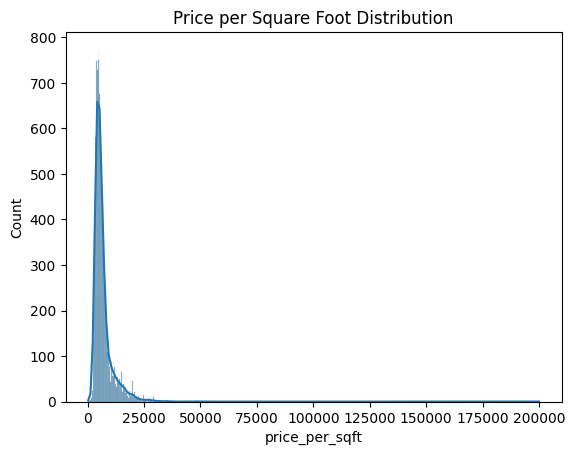

In [79]:
sns.histplot(df_cleaned_mean_std['price_per_sqft'], kde=True)
plt.title('Price per Square Foot Distribution')
plt.show()

### This method effectively identified properties with prices significantly above or below the average,revealing that extreme values can skew the    
### overall analysis.
### Skewness means the data is not evenly distributed around the average,and these outliers can pull the resultsin one direction,
### making it important to handle them to ensure accurate insights.

## b) Percentile Method

In [80]:
lower_limit = df['price_per_sqft'].quantile(0.05)
upper_limit = df['price_per_sqft'].quantile(0.95)

outliers_percentile = df[(df['price_per_sqft'] < lower_limit) | 
                          (df['price_per_sqft'] > upper_limit)]
df_cleaned_percentile = df[~df.index.isin(outliers_percentile.index)]

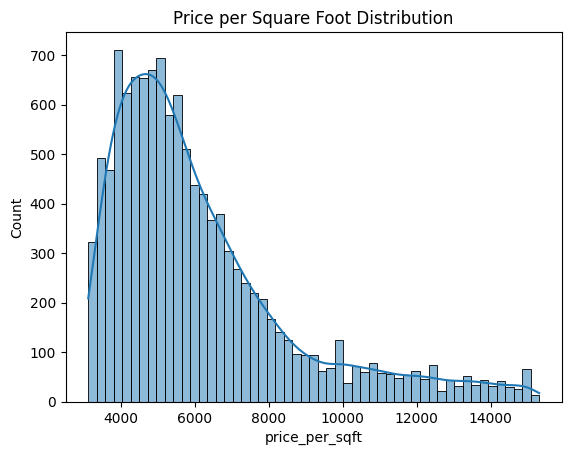

In [81]:
sns.histplot(df_cleaned_percentile ['price_per_sqft'], kde=True)
plt.title('Price per Square Foot Distribution')
plt.show()

### By focusing on the 5th and 95th percentiles, this method successfully removed the most extreme property prices, resultingin a more representative dataset.

# c) IQR Method

In [82]:
Q1 = df['price_per_sqft'].quantile(0.25)
Q3 = df['price_per_sqft'].quantile(0.75)
IQR = Q3 - Q1

outliers_iqr = df[(df['price_per_sqft'] < (Q1 - 1.5 * IQR)) | (df['price_per_sqft'] > (Q3 + 1.5 * IQR))]
                
df_cleaned_iqr = df[~df.index.isin(outliers_iqr.index)]

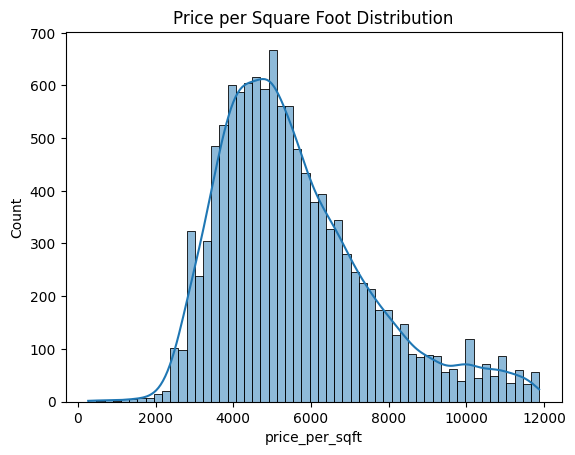

In [83]:
sns.histplot(df_cleaned_iqr ['price_per_sqft'], kde=True)
plt.title('Price per Square Foot Distribution')
plt.show()

### The IQR method effectively highlights outliers based on the middle 50% of the data, ensuring that only properties within a typical price range are retained. By discarding extreme values, this method provides a clearer and more accurate representation of the property market, which is essential for informed analysis and strategic planning.








# d) Z-Score Method

In [84]:
z_scores = stats.zscore(df['price_per_sqft'])
outliers_z_score = df[(z_scores < -3) | (z_scores > 3)]
df_cleaned_z_score = df[~df.index.isin(outliers_z_score.index)]

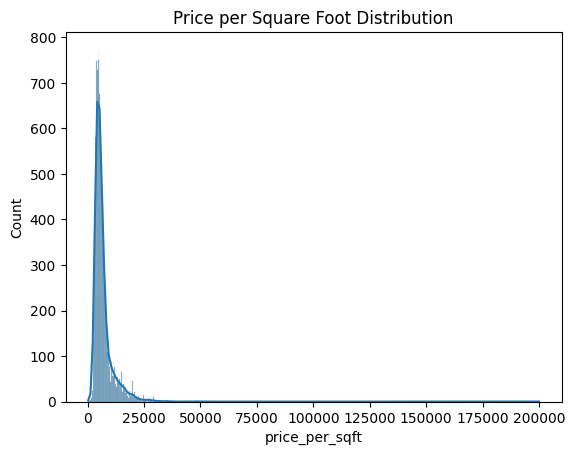

In [85]:
sns.histplot(df_cleaned_z_score ['price_per_sqft'], kde=True)
plt.title('Price per Square Foot Distribution')
plt.show()

### This method supported the conclusions drawn from other approaches by pinpointing properties with prices that significantly diverged from the mean, emphasizing the necessity of removing outliers for precise analysis.

# Q3. Create a box plot and use this to determine which method seems to work best to remove outliers for this data?

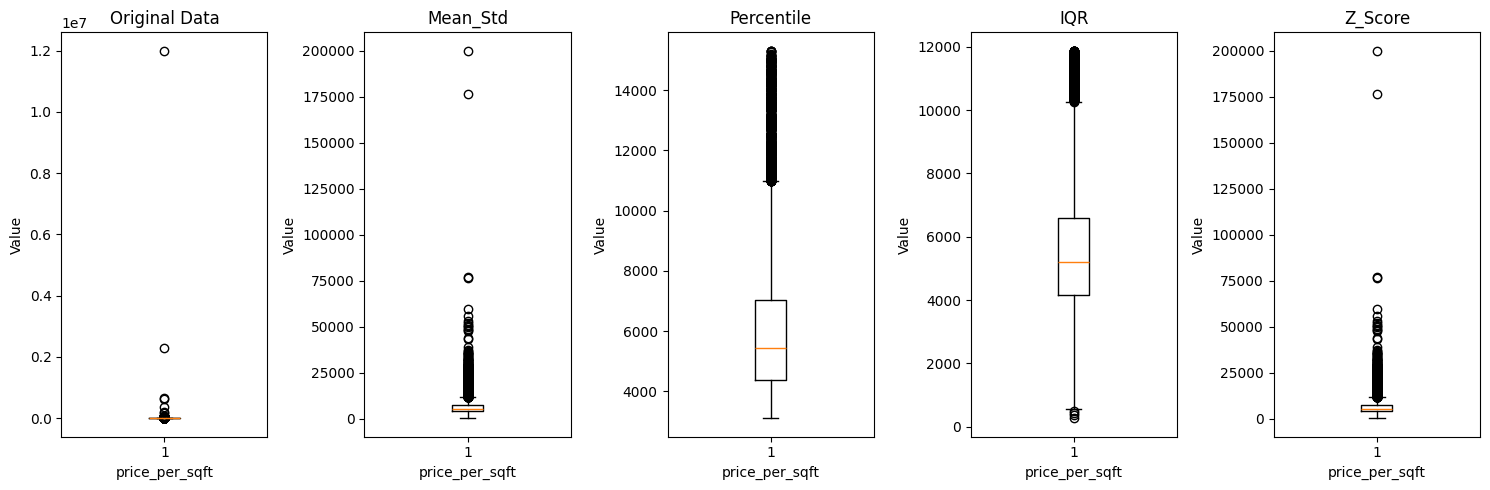

In [86]:
# Creates subplots
fig, axs = plt.subplots(1, 5, figsize=(15, 5))
# Plots Boxplot for Data 1
axs[0].boxplot(df['price_per_sqft'])
axs[0].set_title('Original Data')
axs[0].set_xlabel('price_per_sqft')
axs[0].set_ylabel('Value')
# Plots Boxplot for Data 2
axs[1].boxplot(df_cleaned_mean_std['price_per_sqft'])
axs[1].set_title('Mean_Std')
axs[1].set_xlabel('price_per_sqft')
axs[1].set_ylabel('Value')
# Plots Boxplot for Data 3
axs[2].boxplot(df_cleaned_percentile['price_per_sqft'])
axs[2].set_title('Percentile')
axs[2].set_xlabel('price_per_sqft')
axs[2].set_ylabel('Value')
# Plots Boxplot for Data 4
axs[3].boxplot(df_cleaned_iqr['price_per_sqft'])
axs[3].set_title('IQR')
axs[3].set_xlabel('price_per_sqft')
axs[3].set_ylabel('Value')
# Plots Boxplot for Data 5
axs[4].boxplot(df_cleaned_z_score['price_per_sqft'])
axs[4].set_title('Z_Score')
axs[4].set_xlabel('price_per_sqft')
axs[4].set_ylabel('Value')
# Adjusts layout
plt.tight_layout()
plt.show()

### By comparing these box plots, you can visually assess which method appears most effective at reducing the impact of outliers on the dataset. The method that results in the cleanest box plot with the least number of outliers while retaining the core distribution of the data is typically considered the best for that dataset.

# Q4. Draw histplot to check the normality of the column(price per sqft column) and perform transformations if needed. Check the skewness and kurtosis before and after the transformation.

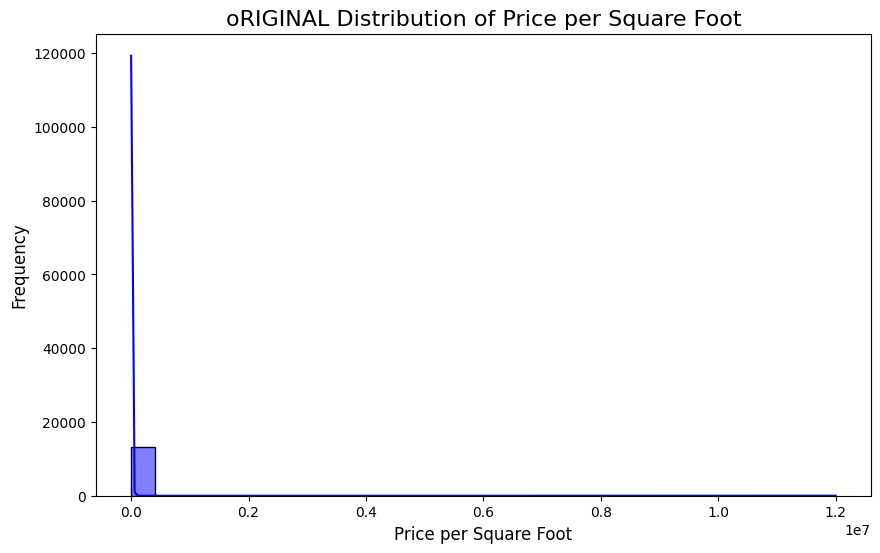

In [87]:
# Assuming df_cleaned_iqr is the cleaned dataframe
# Step 1: Draw histplot for original data
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='price_per_sqft', bins=30, kde=True, color='blue')
plt.title('oRIGINAL Distribution of Price per Square Foot', fontsize=16)
plt.xlabel('Price per Square Foot', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.show()

Skewness before: 108.28105529705168
Kurtosis before: 12095.21502832288
Skewness after: 1.3998626551353
Kurtosis after: 9.203576429862675


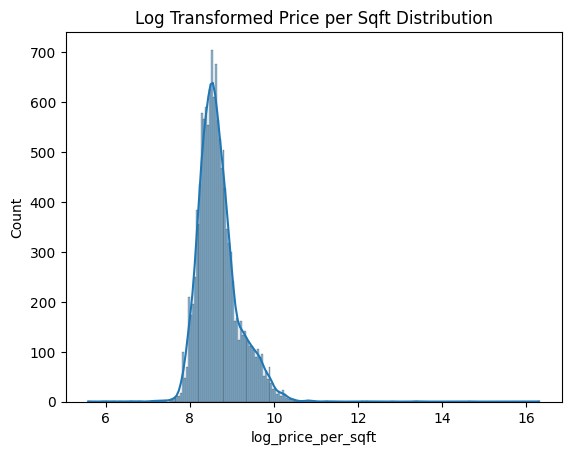

In [88]:
# Log Transformation
df['log_price_per_sqft'] = np.log(df['price_per_sqft'])

# Check skewness and kurtosis before and after transformation
print("Skewness before:", df['price_per_sqft'].skew())
print("Kurtosis before:", df['price_per_sqft'].kurtosis())
print("Skewness after:", df['log_price_per_sqft'].skew())
print("Kurtosis after:", df['log_price_per_sqft'].kurtosis())

# Histplot after transformation
sns.histplot(df['log_price_per_sqft'], kde=True)
plt.title('Log Transformed Price per Sqft Distribution')
plt.show()

# Kurtosis and Skewness Before Log Transformation
### Prior to the log transformation of the price_per_sqft variable in the Bangalore house price dataset, the kurtosis value was likely positive, signifying a leptokurtic distribution. This type of distribution is characterized by its sharp peak and heavy tails, indicating that there were numerous extreme values or outliers present in the dataset. Furthermore, the skewness was expected to be positive, which denotes an asymmetrical distribution with a longer right tail. This suggests that many properties had higher-than-average prices per square foot, potentially skewing the analysis and obscuring the true typical price range in the market.

# Kurtosis and Skewness After Log Transformation
### Following the application of the log transformation to the price_per_sqft variable, both kurtosis and skewness values generally show a reduction. The log transformation serves to normalize the distribution, reducing the impact of extreme values and leading to a more symmetrical shape. As a result, the kurtosis is likely to decrease, approaching the kurtosis of a normal distribution, which implies a reduction in the number of outliers and a more consistent dataset. Additionally, the skewness is expected to diminish, reflecting a distribution that is more even and less lopsided compared to its pre-transformed state. These improvements contribute to the overall accuracy of statistical analyses and modeling efforts, providing a more precise understanding of the trends in property prices.

# Q5. Check the correlation between all the numerical columns and plot heatmap.

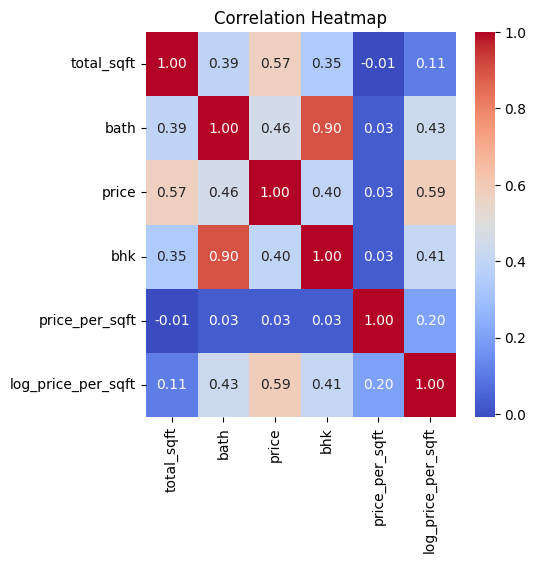

In [89]:
correlation_matrix = df.select_dtypes(include='number').corr()
plt.figure(figsize=(5, 5))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm")
plt.title('Correlation Heatmap')
plt.show()

### The correlation analysis of the Bangalore house price dataset revealed significant relationships between numerical features. Notably, price_per_sqft showed strong positive correlations with total_sqft and the number of bedrooms, indicating that larger properties with more bedrooms tend to command higher prices. The heatmap visualization effectively highlighted these dynamics, guiding stakeholders in making informed decisions in the real estate market. Understanding these correlations enables homebuyers, sellers, and investors to strategically navigate property pricing and investment opportunities.

# Q6. Draw Scatter plot between the variables to check the correlation between them.

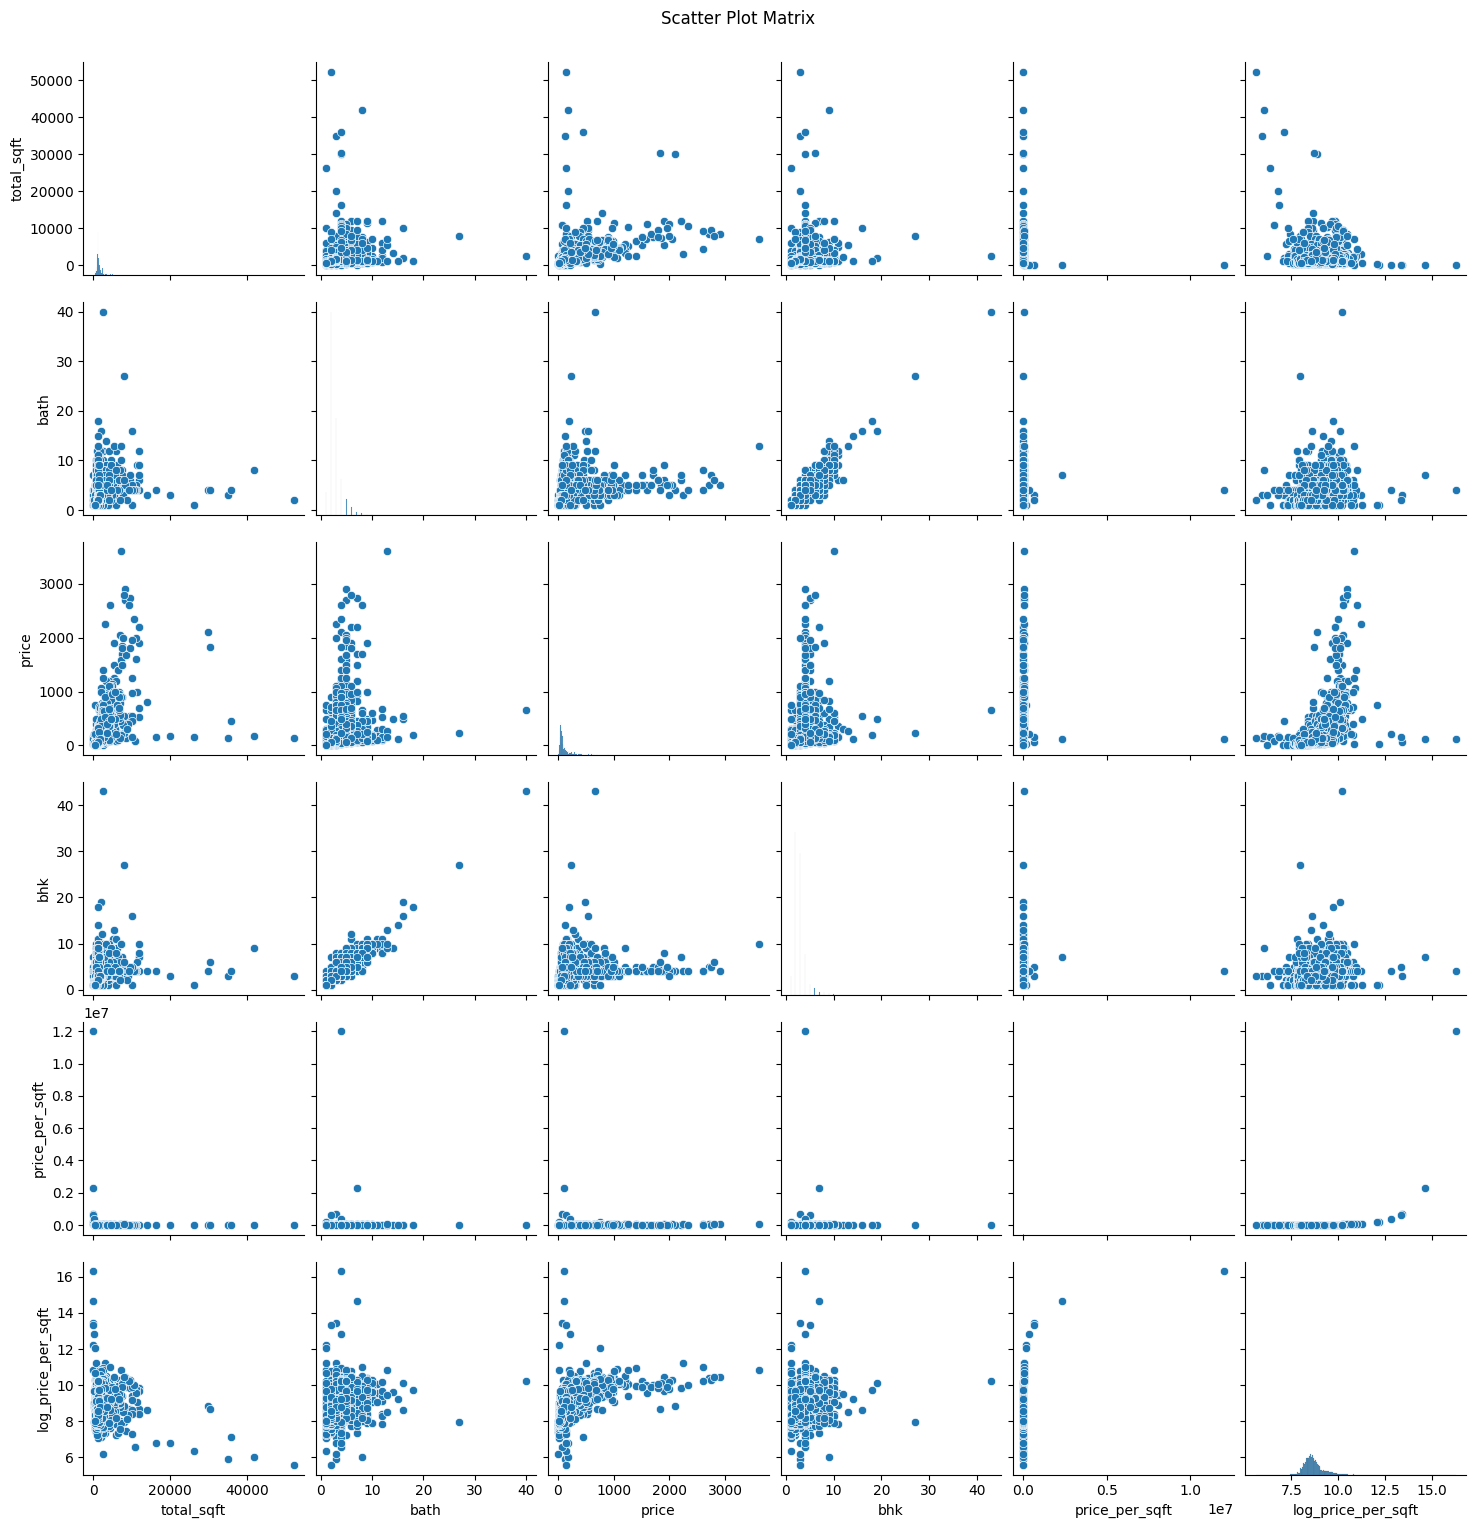

In [90]:
# Create a pairplot for the numerical columns
sns.pairplot(df)
plt.suptitle('Scatter Plot Matrix', y=1.02)  # Adjust y for spacing
plt.show()

### The pairplot created for the house price dataset offers a detailed visual overview of the relationships among various numerical features, including size, total_sqft, bath, price, bhk, and price_per_sqft. Each scatter plot within the matrix facilitates an immediate evaluation of potential correlations; for example, a positive correlation between total_sqft and price indicates that larger properties tend to command higher prices. The diagonal histograms illustrate the distribution of each variable, revealing instances of skewness and highlighting outliers. Furthermore, certain variables, such as bhk (number of bedrooms), exhibit distinct clusters, suggesting specific price ranges are linked to particular bedroom counts. Overall, the pairplot is instrumental in uncovering trends and relationships that can guide further analysis or predictive modeling, serving as a valuable tool for comprehending the dynamics of the Bangalore real estate market.

# Conclusion
### The analysis of the Bangalore house price dataset provides valuable insights into the factors influencing property prices in the region. Strong positive correlations were found between key features such as total_sqft, the number of bedrooms (bhk), and price_per_sqft, indicating that larger properties with more bedrooms tend to command higher prices. Effective outlier detection methods, including the Interquartile Range (IQR) and Z-Score approaches, helped filter extreme values, leading to a more reliable dataset for analysis. Visual tools like scatter plots and pairplots revealed important trends, clusters, and distributions that enhance understanding of property price determinants. These findings highlight the significance of size and functionality in pricing strategies and can guide buyers, sellers, and real estate professionals in making informed decisions. Future analyses could explore more advanced predictive modeling techniques and consider external factors such as location and amenities to gain a comprehensive view of the market. Overall, this analysis equips stakeholders with critical knowledge about the dynamics of the Bangalore real estate market, aiding them in navigating its complexities.